### BIOL520 HOMEWORK 2 ###
$\textbf{Holly Vose}$

In [3]:
# include any imports you'll need here!
import random 
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

## Problem 1 

Complete Exercises 2.1 and 2.2 in Alon. Make sure to compare your results to the real network shown in Figure 2.1, which has 40 self-arrows.

In [13]:
#2.1
def network_gen(arrows, nodes):
    i = 0
    selfpoint = 0
    while i < arrows:
        pfrom = random.choice(range(nodes))

        pto = random.choice(range(nodes))

        #print(str(pfrom) + " points to " + str(pto))

        if pfrom == pto:
            selfpoint+= 1

        i+= 1

    return selfpoint

In [15]:
network_gen(400,500)

1

In [11]:
dataset = np.zeros(100)

for i in range(len(dataset)):
    dataset[i] = network_gen(500, 400)

In [14]:
print("mean: " + str(np.mean(dataset)))
print("standard deviation: " + str(np.std(dataset)))

mean: 1.27
standard deviation: 1.0756858277396797


$\text{For Alon } 2.1: $

$$\text{Mean: } 1.27$$
$$\text{Standard Deviation: } 1.0756858277396797 $$

In [18]:
#Alon 2.2
def mer_network_gen(arrows, nodes, n1):
    i = 0
    selfpoint = 0
    while i < arrows:
        #range that can generate arrows is n1
        pfrom = random.choice(range(n1))
        
        #can point to any node available
        pto = random.choice(range(nodes))

        if pfrom == pto:
            selfpoint+= 1

        i+= 1

    return selfpoint

In [19]:
dataset_mer = np.zeros(100)

for i in range(len(dataset_mer)):
    dataset_mer[i] = mer_network_gen(500, 400, 100)

In [20]:
print("mean: " + str(np.mean(dataset_mer)))
print("standard deviation: " + str(np.std(dataset_mer)))

mean: 1.41
standard deviation: 1.3348782716038192


$\text{For Alon 2.2: }$

$$\text{Mean: } 1.41$$
$$\text{Standard Deviation: } 1.3348782716038192 $$

$\text{If we look at the comparison, the difference of 1 self arrow vs 40 shows a pretty extreme deviation of about 30 standard deviations away from the norm.}$

$\text{In both situations, the predictions of the program versus the actual graph are far, far lower. This would indicate that networks}$
$\text{found in biological systems are likely not random.}$

$\text{For a system of N networks and A arrows, the number of self arrows should be } \frac{A}{N}.$

$\text{With our network values, we should expect an average of } \frac{500}{400} = 1.25. $

$\text{Similarly }$

## Problem 2

Complete Exercise 2.4 in Alon. Note that mathematically finding the steady state for 

$$\frac{dX}{dt} = \frac{\beta}{1+\frac{X^n}{K^n}} - \alpha X \tag{1} $$

is quite difficult, so you can assume the approximation of strong autorepression, where

$$\frac{dX}{dt} = \frac{\beta K^n}{X^n} - \alpha X. \tag{2}$$  

Use this approximate form to find the steady-state and explore its sensitivity to $\beta$ as directed in the book problem.

$\text{We know that steady state will occur when } \frac{dX}{dt} \text{ is 0. By doing so, we can start to isolate X.}$

$$0 = \frac{\beta K^n}{X^n} - \alpha X$$

$$X^n(\alpha X) = \beta K^n$$

$$X^{n+1} = \frac{\beta K^n}{\alpha}$$

$\textbf{We now have all the information needed to find the X steady state:}$

$$X_{st} = \sqrt[n+1]\frac{\beta K^n}{\alpha} = K\left(\frac{\beta}{\alpha K}\right)^\frac{1}{n+1}$$
$\text{(These forms are equivalent)}$

$\text{To find the derivative of the steady state, we must find the derivative of } \beta \text{ with respect to } X_{st}.$

$$ \frac{d}{d\beta} = \frac{K}{(\alpha K)}^\frac{1}{n+1}  \beta ^ \frac{1}{n+1} $$

$$ \frac{d}{d\beta} = \frac{1}{n+1}\left(\frac{K}{(\alpha K)^\frac{1}{n+1}}  \beta ^ {\left(\frac{1}{n+1}\right)-1}\right)$$

$$ \frac{\beta}{d\beta} = \frac{1}{n+1}\left(K\left(\frac{\beta}{\alpha K}\right)^\frac{1}{n+1}\right)$$

$\text{Now that we have the derivative of }\beta, \text{we can now account for the derivative of the steady state.}$

$$ \frac{\beta}{d\beta} = \frac{\frac{1}{n+1}\left(K\left(\frac{\beta}{\alpha K}\right)^\frac{1}{n+1}\right)}{X_{st}} $$

$$ \frac{\beta}{d\beta} = \frac{\frac{1}{n+1}\left(K\left(\frac{\beta}{\alpha K}\right)^\frac{1}{n+1}\right)}{ K\left(\frac{\beta}{\alpha K}\right)^\frac{1}{n+1}} $$

$\textbf{With everything simplified, our final simplified stability equation is: }$

$$ \frac{\beta}{X_{st}} \frac{dX_{st}}{d\beta}  = \frac{1}{n+1}$$

$\text{Here, we can clearly see that our senstivity, } \beta \text{, is dependent on the hill coefficient. Consider the change in steady state with respect to }\beta$

$\text{At large hill coefficients, the robustness is high, as changes in } \beta \text{ are much smaller when reflecting on } X_{st}, \text{ as changes that occur when } n=4 \text{ are reduced by 1/5.}$

$\text{Conversely, at low hill coefficients, the steady state changes by the expected amount, since it is a 1/1 change when } n=0. \text{ We will understand this impact graphically in the next problem.}$

## Problem 3

Continuing your exploration of Exercise 2.4, graphically explore the idea of the sensitivity of the steady-state with respect to $\beta$ as a result of changing $n$. 

Make plots akin to those seen in Figure 2.10 and Figure 2.11, this time where removal is held constant and $\beta$ is varied $\pm$ 10%. Make one version of the plot where $n=4$ and one version where $n=0$. Use your plots to validate that the change in the steady-state upon changing $\beta$ is in fact smaller when $n$ is larger.   

In [5]:
beta1 = 100
betahigh = 110
betalow = 90
K = 5
n1 = 0
n2 = 4
alpha = 10

x = np.linspace(5,15,100)
ydeg = alpha*x
 #put in eq here

In [25]:
def intercepts(x, y1, y2):
    best_ind = 0
    best_val = y2[0]-y1[0]
    
    for i in range(len(x)):
        curr_diff = abs(y2[i]-y1[i])
        if curr_diff < best_val:
            best_val = curr_diff
            best_ind = i
    
    x_int = x[best_ind]
    y_int = y1[best_ind]
    
    
    return x_int, y_int

Graphs cross at the following points:
beta (no change): 99.4949494949495
beta (+10%): 109.59595959595958
beta (-10%): 90.40404040404042
These points are approximations, and could stand to be more accurate with other methods of derivation.


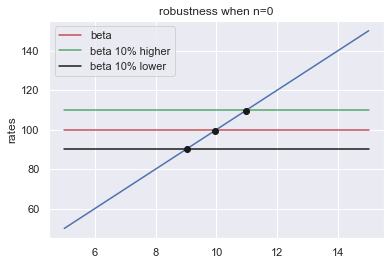

In [34]:
ybeta1 = (beta1*(K**n1))/x**n1
ybetahigh = (betahigh*(K**n1))/x**n1
ybetalow = (betalow*(K**n1))/x**n1

beta_point = intercepts(x, ydeg, ybeta1)
beta_high_point = intercepts(x, ydeg, ybetahigh)
beta_low_point = intercepts(x, ydeg, ybetalow)

plt.plot(x, ybeta1, color = 'r')
plt.plot(x, ybetahigh, color = 'g')
plt.plot(x, ybetalow, color = 'k')
plt.plot(x, ydeg)
plt.plot(beta_point[0], beta_point[1], 'ko')
plt.plot(beta_high_point[0], beta_high_point[1], 'ko')
plt.plot(beta_low_point[0], beta_low_point[1], 'ko')
plt.ylabel('rates')
plt.title('robustness when n=0')
plt.legend(['beta', 'beta 10% higher', 'beta 10% lower'])

print("Graphs cross at the following points:")
print("beta (no change): " + str(beta_point[1]))
print("beta (+10%): " + str(beta_high_point[1]))
print("beta (-10%): " + str(beta_low_point[1]))

print("These points are approximations, and could stand to be more accurate with other methods of derivation.")

$\text{When n is low, we see an even change when } \beta \text{ is 10% bigger or 10% smaller.}$

$\text{Now, if we change the hill coefficient to be really high, we see something different:}$

Graphs cross at the following points:
beta (no change): 57.070707070707066
beta (+10%): 58.08080808080808
beta (-10%): 56.06060606060606
These points are approximations, and could stand to be more accurate with other methods of derivation.


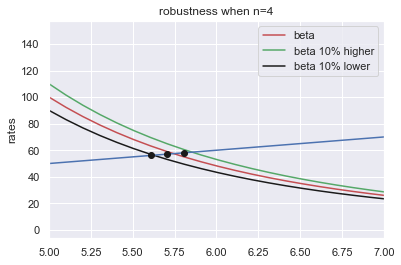

In [33]:
ybeta1 = (beta1*(K**n2))/x**n2
ybetahigh = (betahigh*(K**n2))/x**n2
ybetalow = (betalow*(K**n2))/x**n2

beta_point = intercepts(x, ydeg, ybeta1)
beta_high_point = intercepts(x, ydeg, ybetahigh)
beta_low_point = intercepts(x, ydeg, ybetalow)

plt.plot(x, ybeta1, color = 'r')
plt.plot(x, ybetahigh, color = 'g')
plt.plot(x, ybetalow, color = 'k')
plt.plot(x, ydeg)
plt.xlim(5,7)
plt.plot(beta_point[0], beta_point[1], 'ko')
plt.plot(beta_high_point[0], beta_high_point[1], 'ko')
plt.plot(beta_low_point[0], beta_low_point[1], 'ko')
plt.ylabel('rates')
plt.title('robustness when n=4')
plt.legend(['beta', 'beta 10% higher', 'beta 10% lower'])

print("Graphs cross at the following points:")
print("beta (no change): " + str(beta_point[1]))
print("beta (+10%): " + str(beta_high_point[1]))
print("beta (-10%): " + str(beta_low_point[1]))

print("These points are approximations, and could stand to be more accurate with other methods of derivation.")

$\text{And indeed, we see that our analysis of the steady state robustness is correct.}$
$\text{When } n \text{ is low, the changes are relatively constant across changes in }\beta.$
$\text{But when } n \text{ is high, the changes are much smaller relative to each other, indicating a robust system.}$